In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import APL1_functions as AC

In [2]:

# Aspect ratios at different alphas for targets at [10, 15, 20, 25, 30]
aspect_ratios_5e4 = [np.float64(0.09831616565112951), np.float64(0.10327121349007279), np.float64(0.10706065687504354), np.float64(0.11017255234169927), np.float64(0.11283746999727927)]
aspect_ratios_1e4 = [np.float64(0.0983113322886335), np.float64(0.10326955210011893), np.float64(0.10705984330745438), np.float64(0.11017208974059205), np.float64(0.11283714525084576)]
aspect_ratios_5e3 = [np.float64(0.09837673192155198), np.float64(0.10329059228112623), np.float64(0.10706972458054723), np.float64(0.11017786395168641), np.float64(0.11284107521918753)]
aspect_ratios_1e3 = [np.float64(0.09832232359412532), np.float64(0.10327331738297928), np.float64(0.10706164164920995), np.float64(0.1101731464252775), np.float64(0.11283786599310776)]

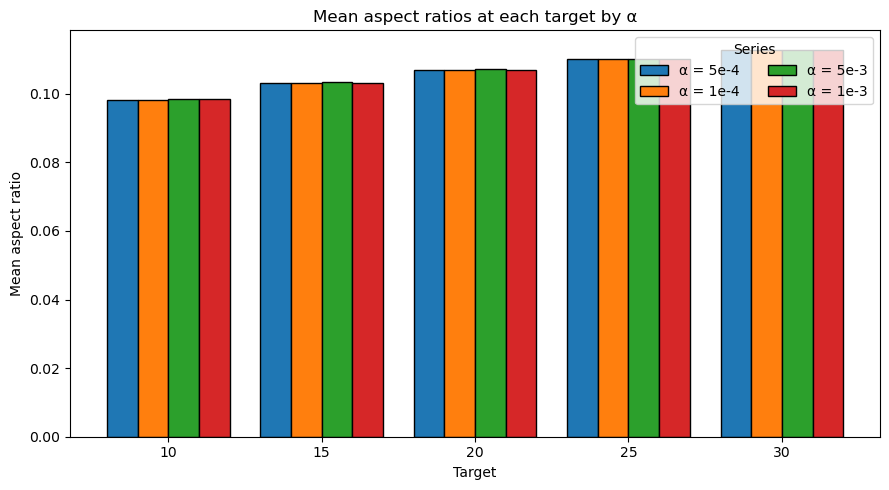

In [3]:

targets = np.array([10, 15, 20, 25, 30])
series = [
    (r'α = 5e-4', aspect_ratios_5e4),
    (r'α = 1e-4', aspect_ratios_1e4),
    (r'α = 5e-3', aspect_ratios_5e3),
    (r'α = 1e-3', aspect_ratios_1e3),
]

x = np.arange(len(targets))
n = len(series)
width = 0.8 / n  # total bar pack width ~0.8

plt.figure(figsize=(9,5))
for i, (label, vals) in enumerate(series):
    offset = (i - (n-1)/2) * width
    plt.bar(x + offset, vals, width=width, edgecolor='k', label=label)

plt.xticks(x, targets)
plt.xlabel('Target')
plt.ylabel('Mean aspect ratio')
plt.title('Mean aspect ratios at each target by α')
plt.legend(title='Series', ncol=2)
plt.tight_layout()
plt.show()


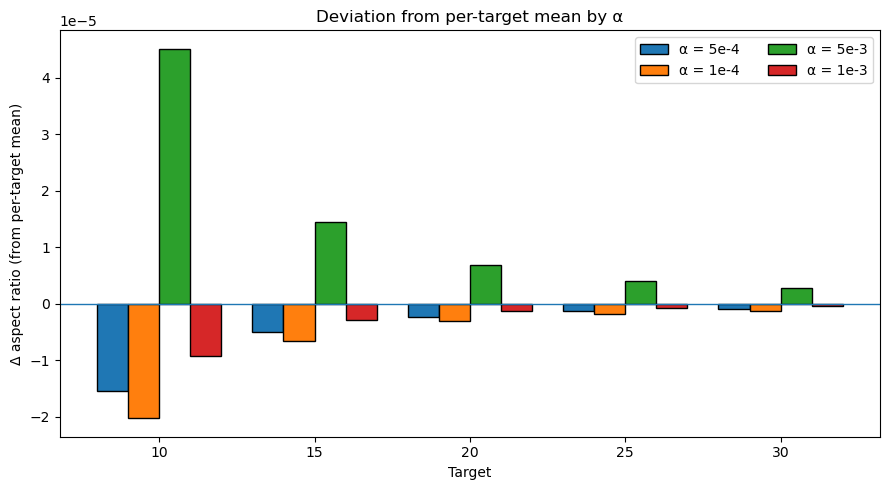

In [4]:
arr = np.vstack([s[1] for s in series])          # shape (4, 5)
grand_mean = arr.mean(axis=0, keepdims=True)     # per-target mean across α
deltas = arr - grand_mean                        # deviations

plt.figure(figsize=(9,5))
for i, (label, _) in enumerate(series):
    offset = (i - (n-1)/2) * width
    plt.bar(x + offset, deltas[i], width=width, edgecolor='k', label=label)
plt.axhline(0, linewidth=1)
plt.xticks(x, targets)
plt.xlabel('Target')
plt.ylabel('Δ aspect ratio (from per-target mean)')
plt.title('Deviation from per-target mean by α')
plt.legend(ncol=2)
plt.tight_layout()
plt.show()


In [5]:
aspect_ratio_5e4 = aspect_ratios_5e4[0]
aspect_ratio_1e4 = aspect_ratios_1e4[0]
aspect_ratio_5e3 = aspect_ratios_5e3[0]
aspect_ratio_1e3 = aspect_ratios_1e3[0]

print(aspect_ratio_5e4)
print(aspect_ratio_1e4)
print(aspect_ratio_5e3)
print(aspect_ratio_1e3)

0.09831616565112951
0.0983113322886335
0.09837673192155198
0.09832232359412532


Aspect Ratio:

$\frac{H}{r}$

Equation for Reynolds Number:

$\mathfrak{R}$ = $\alpha_\nu^{-1}*(\frac{r}{H})^{2}$


In [6]:
Reynolds_5e4 = (aspect_ratio_5e4**(-2)) / (5*10**(-4))
Reynolds_1e4 = (aspect_ratio_1e4**(-2)) / (1*10**(-4))
Reynolds_5e3 = (aspect_ratio_5e3**(-2)) / (5*10**(-3))
Reynolds_1e3 = (aspect_ratio_1e3**(-2)) / (1*10**(-3))


In [7]:
print(Reynolds_5e4)
print(Reynolds_1e4)
print(Reynolds_5e3)
print(Reynolds_1e3)

206909.35666626558
1034648.5104145535
20665.46649279972
103441.71997253466


In [8]:
df = pd.read_csv("C:\\Users\\casey\\UnigeMasters\\Astrophysics_Lab_Disc_Truncation\\Databases\\C1.csv", header=[0,1,2])

In [9]:
display(df['Circumsecondary']['0.3'])

,R,b,c
0,10000.0,-0.79,0.97
1,100000.0,-0.82,0.81
2,1000000.0,-0.83,0.69


In [10]:
display(df['Circumprimary'])

0.1                    0.2                    0.3              \
           R     b     c          R     b     c          R     b     c   
0    10000.0 -0.66  0.84    10000.0 -0.72  0.88    10000.0 -0.76  0.92   
1   100000.0 -0.75  0.68   100000.0 -0.78  0.72   100000.0 -0.80  0.75   
2  1000000.0 -0.78  0.56  1000000.0 -0.80  0.60  1000000.0 -0.81  0.63   

         0.4                    0.5              
           R     b     c          R     b     c  
0    10000.0 -0.77  0.95    10000.0 -0.78  0.94  
1   100000.0 -0.81  0.78   100000.0 -0.81  0.78  
2  1000000.0 -0.82  0.66  1000000.0 -0.82  0.66

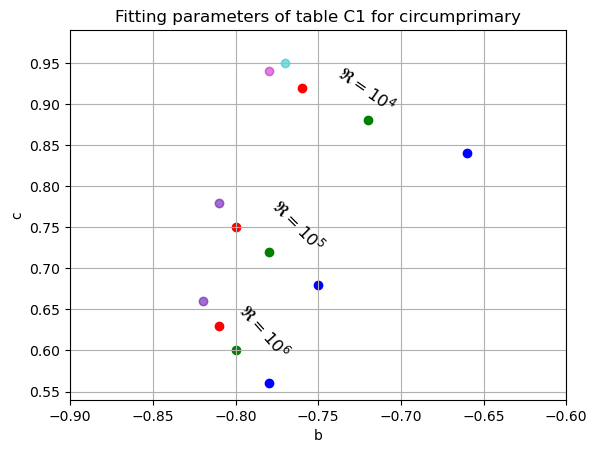

In [11]:
plt.scatter(df['Circumprimary']['0.1']['b'], df['Circumprimary']['0.1']['c'], color='b', label=r'$\mu = 0.1$')
plt.scatter(df['Circumprimary']['0.2']['b'], df['Circumprimary']['0.2']['c'], color='g', label=r'$\mu = 0.2$')
plt.scatter(df['Circumprimary']['0.3']['b'], df['Circumprimary']['0.3']['c'], color='r', label=r'$\mu = 0.3$')
plt.scatter(df['Circumprimary']['0.4']['b'], df['Circumprimary']['0.4']['c'], color='c', alpha=.5, label=r'$\mu = 0.4$')
plt.scatter(df['Circumprimary']['0.5']['b'], df['Circumprimary']['0.5']['c'], color='m', alpha=.5, label=r'$\mu = 0.5$')

plt.xlim(-.9,-.6)
plt.ylim(.54, .99)

plt.text(-0.80, 0.59, r"$\mathfrak{R} = 10^{6}$", rotation=-48, fontsize=12, color="k")
plt.text(-0.78, 0.72, r"$\mathfrak{R} = 10^{5}$", rotation=-45, fontsize=12, color="k")
plt.text(-0.74, 0.89, r"$\mathfrak{R} = 10^{4}$", rotation=-35, fontsize=12, color="k")


plt.xlabel('b')
plt.ylabel('c')
plt.title('Fitting parameters of table C1 for circumprimary')
plt.tight_layout
plt.grid()
plt.show()

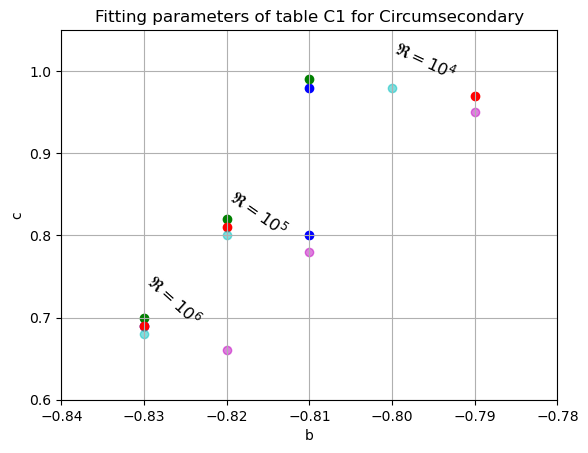

In [12]:
plt.scatter(df['Circumsecondary']['0.1']['b'], df['Circumsecondary']['0.1']['c'], color='b', label=r'$\mu = 0.1$')
plt.scatter(df['Circumsecondary']['0.2']['b'], df['Circumsecondary']['0.2']['c'], color='g', label=r'$\mu = 0.2$')
plt.scatter(df['Circumsecondary']['0.3']['b'], df['Circumsecondary']['0.3']['c'], color='r', label=r'$\mu = 0.3$')
plt.scatter(df['Circumsecondary']['0.4']['b'], df['Circumsecondary']['0.4']['c'], color='c', alpha=.5, label=r'$\mu = 0.4$')
plt.scatter(df['Circumsecondary']['0.5']['b'], df['Circumsecondary']['0.5']['c'], color='m', alpha=.5, label=r'$\mu = 0.5$')

plt.xlim(-.84,-.78)
plt.ylim(.6, 1.05)

plt.text(-0.83, 0.69, r"$\mathfrak{R} = 10^{6}$", rotation=-42, fontsize=12, color="k")
plt.text(-0.82, 0.8, r"$\mathfrak{R} = 10^{5}$", rotation=-35, fontsize=12, color="k")
plt.text(-0.80, .99, r"$\mathfrak{R} = 10^{4}$", rotation=-25, fontsize=12, color="k")


plt.xlabel('b')
plt.ylabel('c')
plt.title('Fitting parameters of table C1 for Circumsecondary')
plt.tight_layout
plt.grid()
plt.show()

define your function "truncation_radius" which 
gets in input M1, M2, abin, ebin, alpha 
    
    calculate R eggleton (DONE)
    
    calculates the Re given H/r found before (DONE)
    
    Fits b and c as a function of Re (table c1) for the 5 values of mu (i.e. 5 different fits) (Done)
    
    interpolates at the given Re, so you get 5 values of b and five values of c (which differ in mu:0.1,0.2,0.3,0.4,0.5 as in the table) (Done)
    
    fits these values of b and c to get the dependance on mu (Done)
    
    interpolate such fits at the given mu=M2/M1+M2 so you get one value of b and one value of c (Done)
    
    finally, you use formula 3 with the b and c found + the other binary parameters 

In [13]:

alpha = [5e-4, 1e-4, 5e-3, 1e-3]
aspect_ratio = [aspect_ratio_5e4, aspect_ratio_1e4, aspect_ratio_5e3, aspect_ratio_1e3]


Re = AC.Reynolds(alpha, aspect_ratio)

print(Re)


known_mu = [0.1, 0.2, 0.3, 0.4, 0.5]

b = []
c = []
R = df['Circumprimary']['0.1']['R']
for ii in range(len(known_mu)):
    bs = df['Circumprimary'][str(known_mu[ii])]['b']
    cs = df['Circumprimary'][str(known_mu[ii])]['c']
    b.append(bs)
    c.append(cs)
    


index = [0, 1, 2, 3, 4]
points = AC.make_pts(b, c, index[0])

print("matrix of points is: " + str(points))
print('')
print("row of points is: " + str(points[0]))
print('')
print("b is: " + str(points[0][0]))



[np.float64(206909.35666626558), np.float64(1034648.5104145535), np.float64(20665.46649279972), np.float64(103441.71997253466)]
matrix of points is: [[-6.6e-01  8.4e-01  1.0e+04]
 [-7.5e-01  6.8e-01  1.0e+05]
 [-7.8e-01  5.6e-01  1.0e+06]]

row of points is: [-6.6e-01  8.4e-01  1.0e+04]

b is: -0.66


$\mathbf{b} = a*\mathbf{Re}^{2}+d*\mathbf{Re}+e\;\;\;\;\;\; (1)$


$\mathbf{c} = a*\mathbf{Re}^{2}+d*\mathbf{Re}+e\;\;\;\;\;\; (1)$


Where Re is the Reynolds number, and b and c are the parameters were fitting for and a, d, and e are coefficients of the polynomial of degree 2

$R_{trunc} (M1, M2, e, a) = R_{egg,i}*(b*e^{c} + 0.88*\mu^{0.01}) $

In [15]:


# # Example data (replace with yours)
# x = np.array(b[0])
# y = np.log(R)

# def test_exp(x, a, b):
#     return a * np.exp(b * x)

# # Fit model to data
# param, param_cov = curve_fit(test_exp, x, y)

# # Extract uncertainties of parameters
# perr = np.sqrt(np.diag(param_cov))  # 1σ errors
# print("Best-fit parameters:", param)
# print("Parameter uncertainties:", perr)

# # Generate fitted curve
# x_fit = np.linspace(min(x), max(x), 200)
# y_fit = test_exp(x_fit, *param)

# # --- Compute uncertainty in fitted curve ---
# # Error propagation: σ_y^2 = (∂y/∂a)^2 σ_a^2 + (∂y/∂b)^2 σ_b^2 + 2 (∂y/∂a)(∂y/∂b) cov(a,b)
# a, b_fit = param
# σ_a, σ_b = perr
# cov_ab = param_cov[0, 1]

# # Derivatives
# dy_da = np.exp(b_fit * x_fit)
# dy_db = a * x_fit * np.exp(b_fit * x_fit)

# # Propagate error
# σ_y = np.sqrt((dy_da * σ_a)**2 + (dy_db * σ_b)**2 + 2 * dy_da * dy_db * cov_ab)

# # Plot original data and fitted curve with error band
# plt.figure(figsize=(8,5))
# plt.errorbar(x, y, yerr=None, fmt='o', color='red', label='Data')  # you can add yerr if you have measurement errors
# plt.plot(x_fit, y_fit, '--', color='blue', label='Best-fit curve')
# plt.fill_between(x_fit, y_fit - σ_y, y_fit + σ_y, color='blue', alpha=0.2, label='1σ uncertainty')

# plt.xlabel('b')
# plt.ylabel('R')
# plt.title('Exponential Curve Fit with 1σ Error Band')
# plt.legend()
# plt.grid(True)
# plt.show()



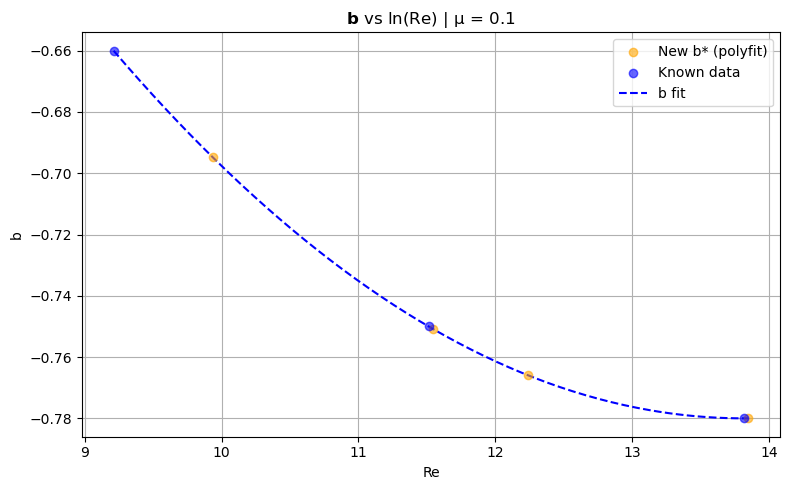

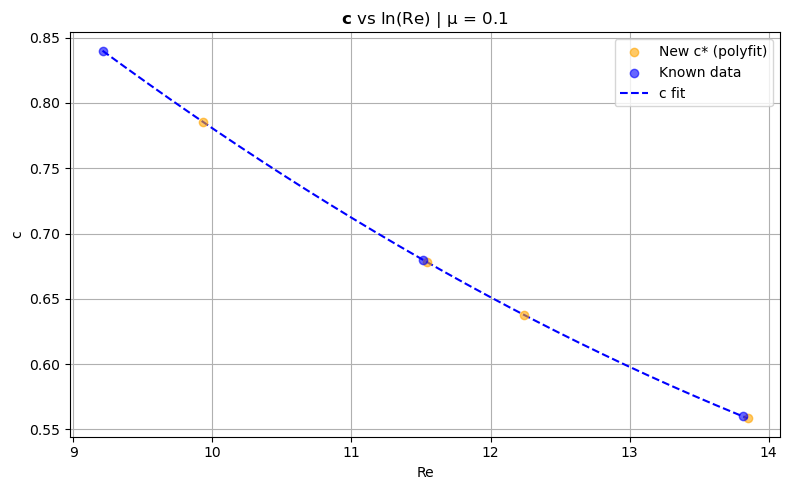

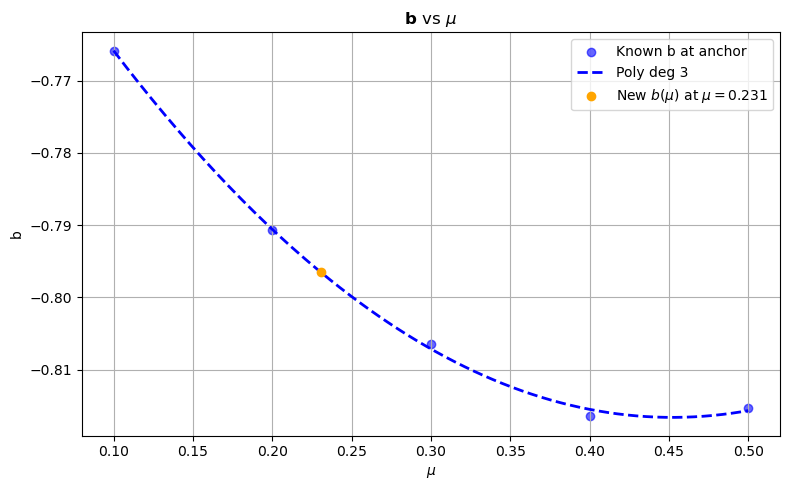

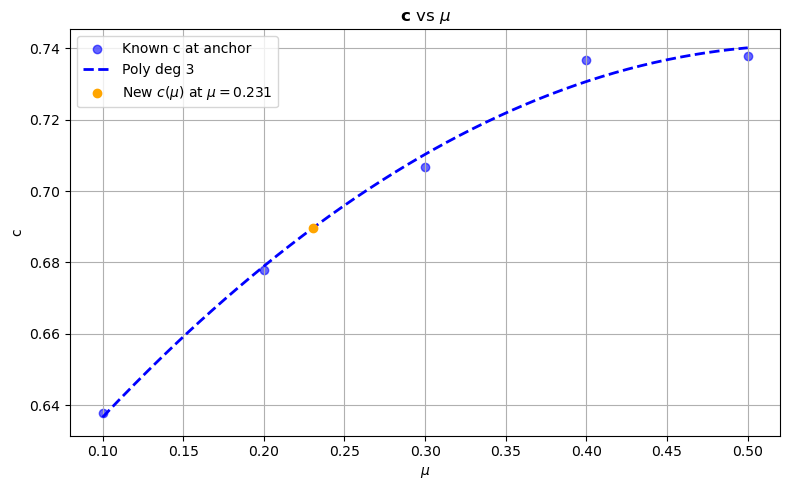

In [16]:
out_re = AC.find_and_plot_new_bc_points_re_and_mu(b, c,index[0],Re,Re_fit=True, Mu_fit=False,plotting=True)



out_mu = AC.find_and_plot_new_bc_points_re_and_mu(b, c,mu_indices=[0,1,2,3,4],Re_fit=False, Mu_fit=True,R_targets=Re,M1=1.0, M2=0.3,re_idx=0, deg_mu=3,plotting=True)


In [17]:
out_re = AC.find_and_plot_new_bc_points_re_and_mu(b, c,index[0],Re,Re_fit=True, Mu_fit=False,plotting=True)
out_mu = AC.find_and_plot_new_bc_points_re_and_mu(b, c,mu_indices=[0,1,2,3,4],Re_fit=False, Mu_fit=True,M1=1.0, M2=0.3,re_idx=0, deg_mu=3,plotting=True)
newb, newc = AC.show_me_new_points(b, c, index[0],Re,M1=1, M2=.3,deg_mu=3,re_idx=0)

# print results
print("\n--- b-values ---")
for line in newb:
    print(line)

print("\n--- c-values ---")
for line in newc:
    print(line)

NameError: name 'AC' is not defined

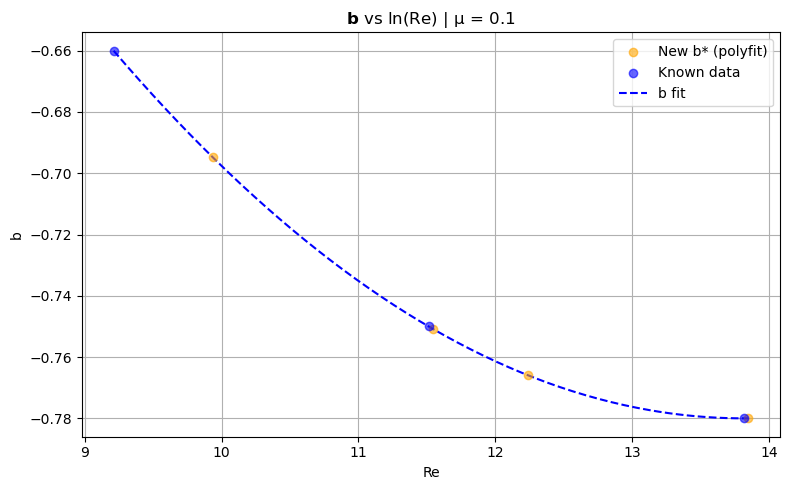

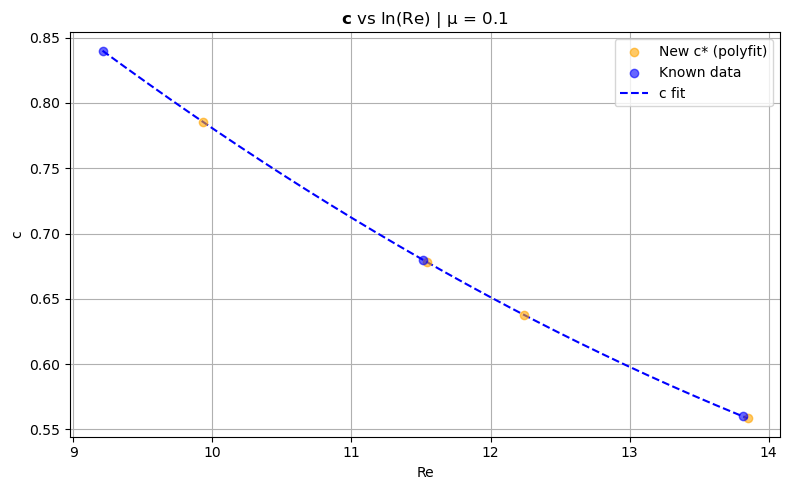

(['At μ_index=0 (μ≈0.1), Re=206909.35666626558: b = -0.7660 ± 0.0000', 'At μ_index=0 (μ≈0.1), Re=1034648.5104145535: b = -0.7800 ± 0.0000', 'At μ_index=0 (μ≈0.1), Re=20665.46649279972: b = -0.6948 ± 0.0000', 'At μ_index=0 (μ≈0.1), Re=103441.71997253466: b = -0.7509 ± 0.0000'], ['At μ_index=0 (μ≈0.1), Re=206909.35666626558: c = 0.6378 ± 0.0000', 'At μ_index=0 (μ≈0.1), Re=1034648.5104145535: c = 0.5585 ± 0.0000', 'At μ_index=0 (μ≈0.1), Re=20665.46649279972: c = 0.7852 ± 0.0000', 'At μ_index=0 (μ≈0.1), Re=103441.71997253466: c = 0.6779 ± 0.0000'])


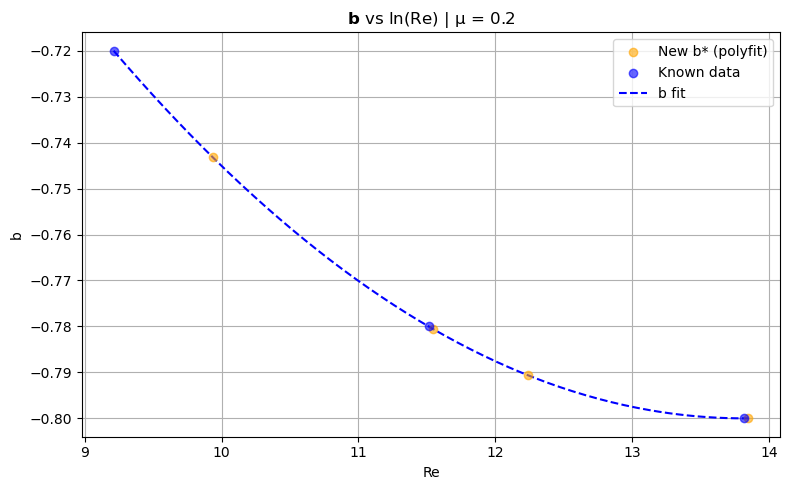

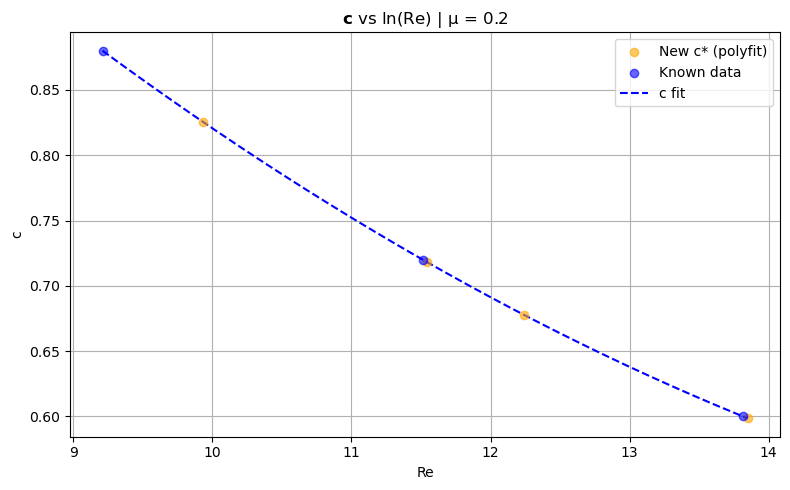

(['At μ_index=1 (μ≈0.2), Re=206909.35666626558: b = -0.7906 ± 0.0000', 'At μ_index=1 (μ≈0.2), Re=1034648.5104145535: b = -0.8000 ± 0.0000', 'At μ_index=1 (μ≈0.2), Re=20665.46649279972: b = -0.7432 ± 0.0000', 'At μ_index=1 (μ≈0.2), Re=103441.71997253466: b = -0.7806 ± 0.0000'], ['At μ_index=1 (μ≈0.2), Re=206909.35666626558: c = 0.6778 ± 0.0000', 'At μ_index=1 (μ≈0.2), Re=1034648.5104145535: c = 0.5985 ± 0.0000', 'At μ_index=1 (μ≈0.2), Re=20665.46649279972: c = 0.8252 ± 0.0000', 'At μ_index=1 (μ≈0.2), Re=103441.71997253466: c = 0.7179 ± 0.0000'])


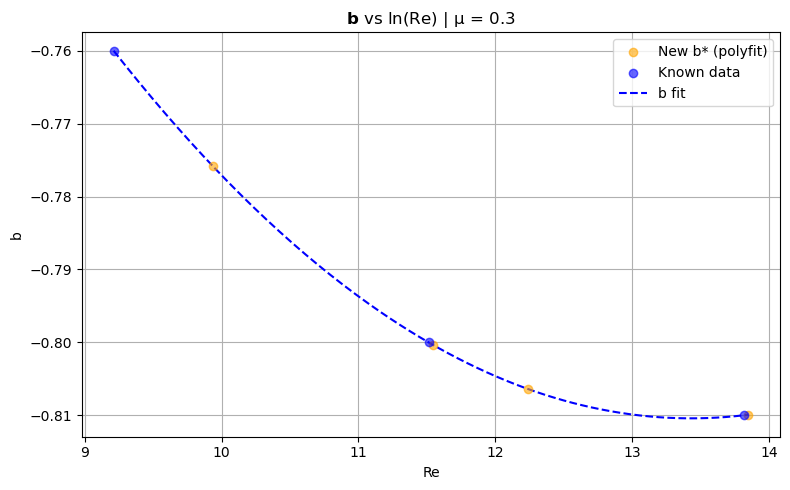

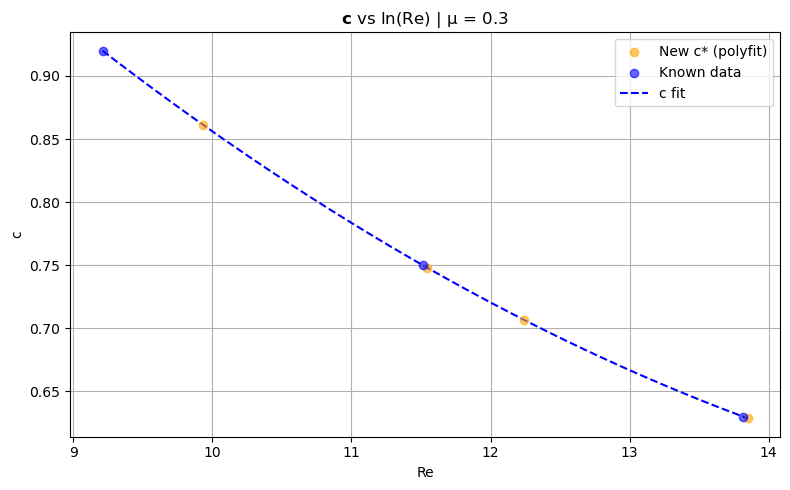

(['At μ_index=2 (μ≈0.3), Re=206909.35666626558: b = -0.8064 ± 0.0000', 'At μ_index=2 (μ≈0.3), Re=1034648.5104145535: b = -0.8099 ± 0.0000', 'At μ_index=2 (μ≈0.3), Re=20665.46649279972: b = -0.7758 ± 0.0000', 'At μ_index=2 (μ≈0.3), Re=103441.71997253466: b = -0.8004 ± 0.0000'], ['At μ_index=2 (μ≈0.3), Re=206909.35666626558: c = 0.7067 ± 0.0000', 'At μ_index=2 (μ≈0.3), Re=1034648.5104145535: c = 0.6286 ± 0.0000', 'At μ_index=2 (μ≈0.3), Re=20665.46649279972: c = 0.8610 ± 0.0000', 'At μ_index=2 (μ≈0.3), Re=103441.71997253466: c = 0.7479 ± 0.0000'])


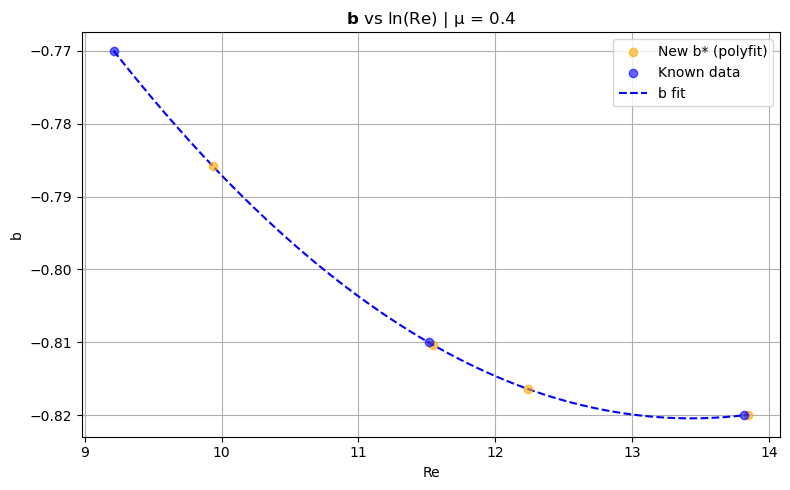

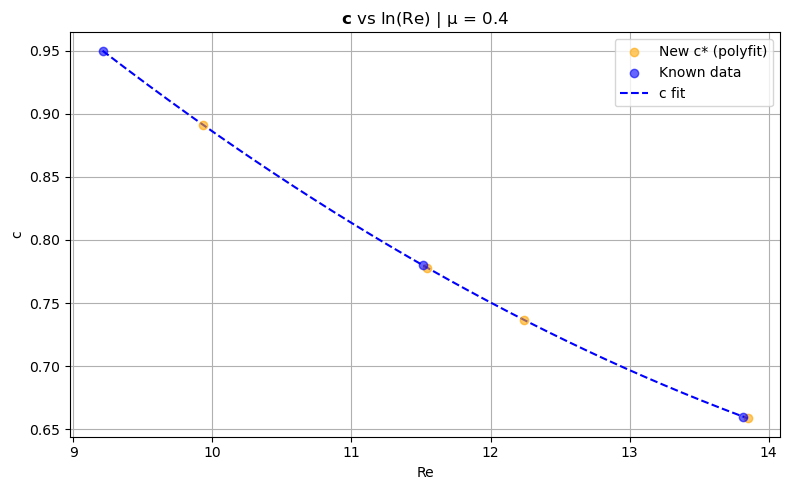

(['At μ_index=3 (μ≈0.4), Re=206909.35666626558: b = -0.8164 ± 0.0000', 'At μ_index=3 (μ≈0.4), Re=1034648.5104145535: b = -0.8199 ± 0.0000', 'At μ_index=3 (μ≈0.4), Re=20665.46649279972: b = -0.7858 ± 0.0000', 'At μ_index=3 (μ≈0.4), Re=103441.71997253466: b = -0.8104 ± 0.0000'], ['At μ_index=3 (μ≈0.4), Re=206909.35666626558: c = 0.7367 ± 0.0000', 'At μ_index=3 (μ≈0.4), Re=1034648.5104145535: c = 0.6586 ± 0.0000', 'At μ_index=3 (μ≈0.4), Re=20665.46649279972: c = 0.8910 ± 0.0000', 'At μ_index=3 (μ≈0.4), Re=103441.71997253466: c = 0.7779 ± 0.0000'])


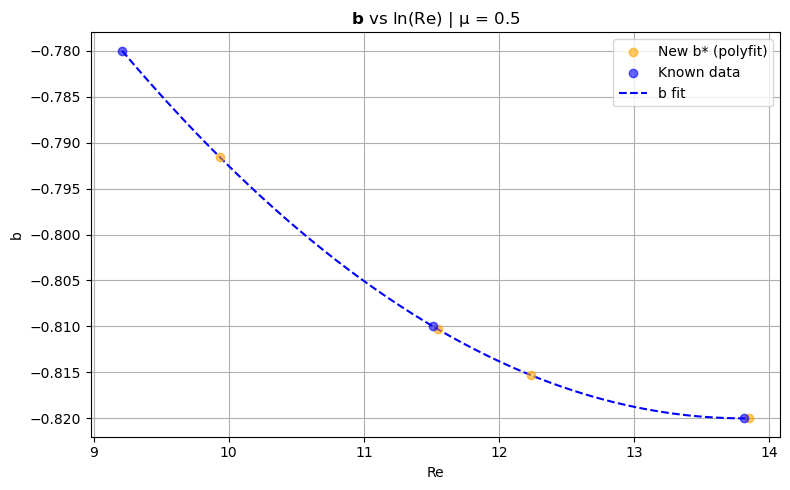

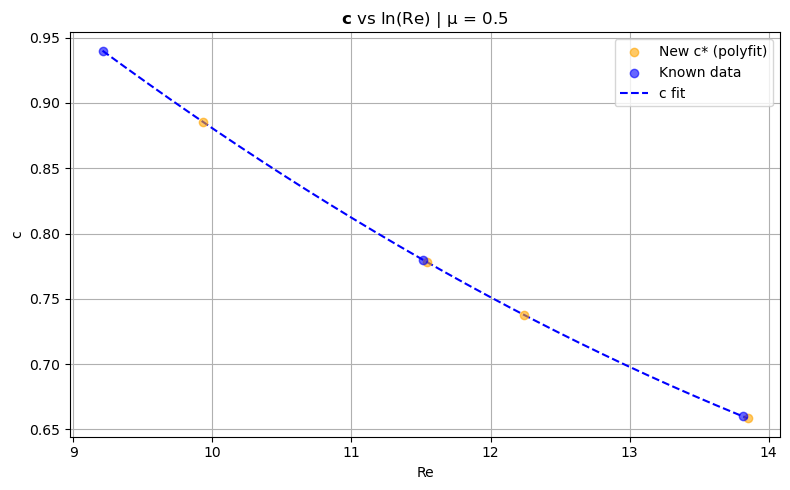

(['At μ_index=4 (μ≈0.5), Re=206909.35666626558: b = -0.8153 ± 0.0000', 'At μ_index=4 (μ≈0.5), Re=1034648.5104145535: b = -0.8200 ± 0.0000', 'At μ_index=4 (μ≈0.5), Re=20665.46649279972: b = -0.7916 ± 0.0000', 'At μ_index=4 (μ≈0.5), Re=103441.71997253466: b = -0.8103 ± 0.0000'], ['At μ_index=4 (μ≈0.5), Re=206909.35666626558: c = 0.7378 ± 0.0000', 'At μ_index=4 (μ≈0.5), Re=1034648.5104145535: c = 0.6585 ± 0.0000', 'At μ_index=4 (μ≈0.5), Re=20665.46649279972: c = 0.8852 ± 0.0000', 'At μ_index=4 (μ≈0.5), Re=103441.71997253466: c = 0.7779 ± 0.0000'])


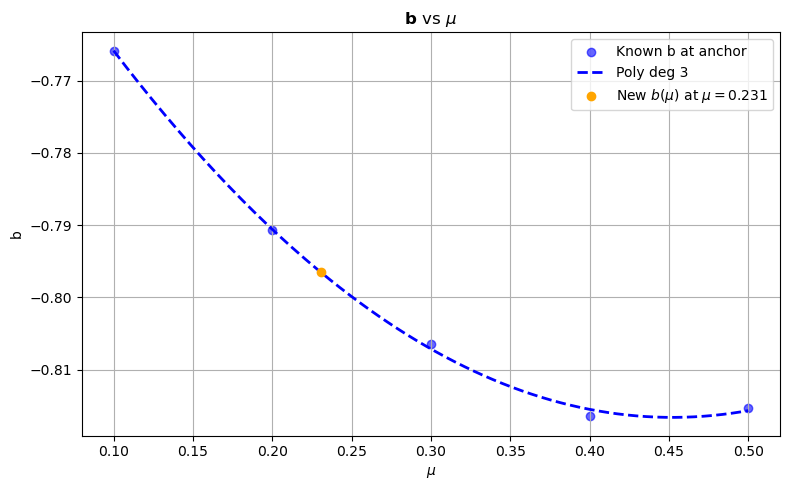

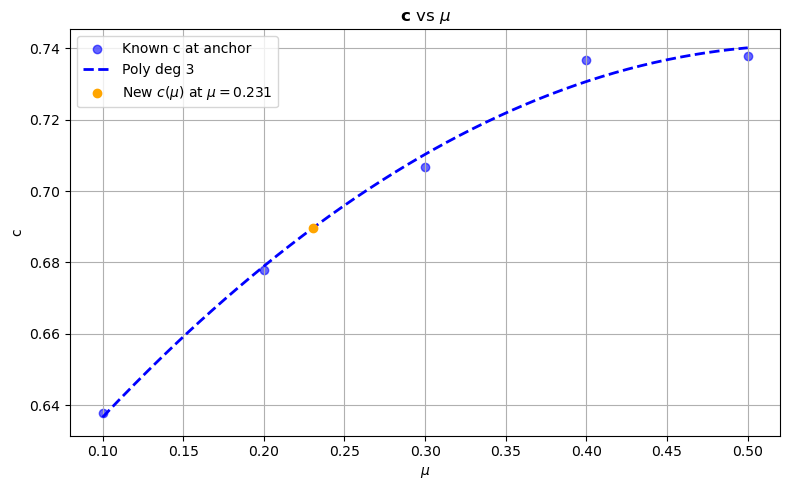

(['Computed μ from masses: μ = 0.2308  →  b(μ) = -0.7965 ± 0.0000 for Re = 1e+04)'], ['Computed μ from masses: μ = 0.2308  →  c(μ) = 0.6898 ± 0.0000 for Re = 1e+04)'])


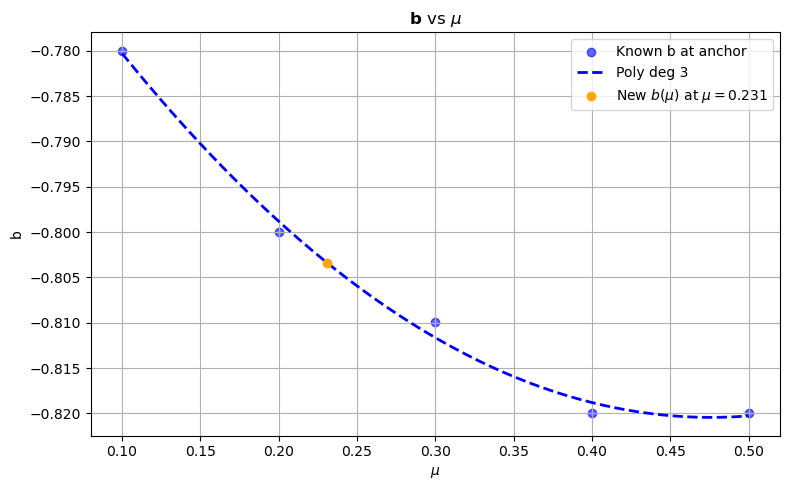

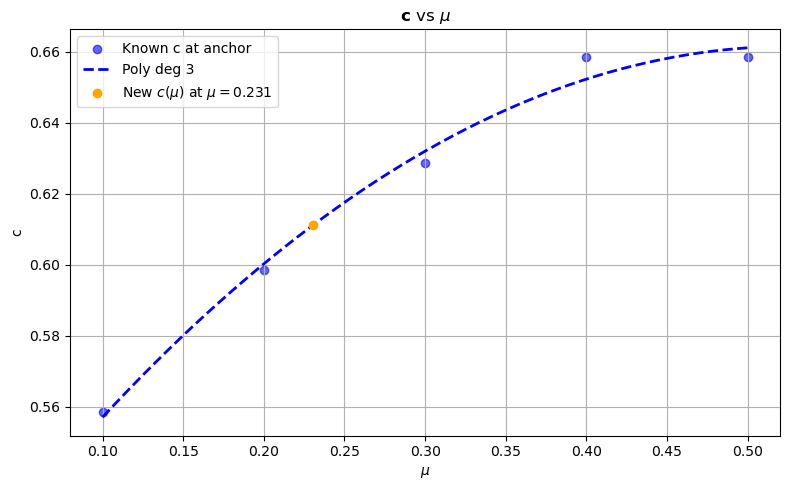

(['Computed μ from masses: μ = 0.2308  →  b(μ) = -0.8034 ± 0.0000 for Re = 1e+05)'], ['Computed μ from masses: μ = 0.2308  →  c(μ) = 0.6113 ± 0.0000 for Re = 1e+05)'])


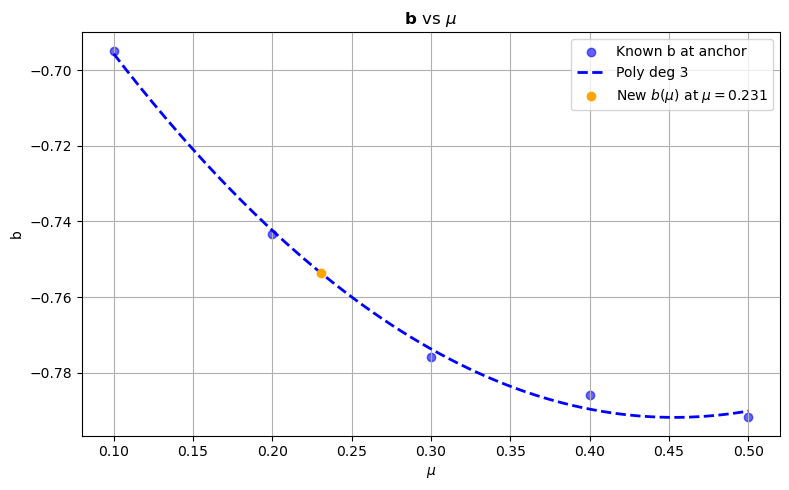

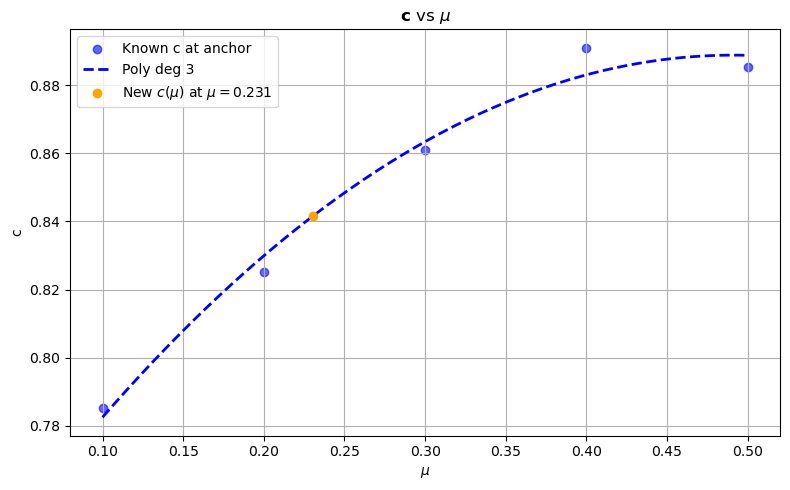

(['Computed μ from masses: μ = 0.2308  →  b(μ) = -0.7536 ± 0.0000 for Re = 1e+06)'], ['Computed μ from masses: μ = 0.2308  →  c(μ) = 0.8417 ± 0.0000 for Re = 1e+06)'])


In [32]:
AC.find_and_plot_new_bc_points_re_and_mu(b, c,index[0],Re,Re_fit=True, Mu_fit=False,plotting=True)
print(AC.show_me_new_points(b, c, index[0], Re, M1=1.0, M2=0.3,print_mu=False, print_Re=True))

AC.find_and_plot_new_bc_points_re_and_mu(b, c,index[1],Re,Re_fit=True, Mu_fit=False,plotting=True)
print(AC.show_me_new_points(b, c, index[1], Re, M1=1.0, M2=0.3,print_mu=False, print_Re=True))

AC.find_and_plot_new_bc_points_re_and_mu(b, c,index[2],Re,Re_fit=True, Mu_fit=False,plotting=True)
print(AC.show_me_new_points(b, c, index[2], Re, M1=1.0, M2=0.3,print_mu=False, print_Re=True))

AC.find_and_plot_new_bc_points_re_and_mu(b, c,index[3],Re,Re_fit=True, Mu_fit=False,plotting=True)
print(AC.show_me_new_points(b, c, index[3], Re, M1=1.0, M2=0.3,print_mu=False, print_Re=True))

AC.find_and_plot_new_bc_points_re_and_mu(b, c,index[4],Re,Re_fit=True, Mu_fit=False,plotting=True)
print(AC.show_me_new_points(b, c, index[4], Re, M1=1.0, M2=0.3,print_mu=False, print_Re=True))

AC.find_and_plot_new_bc_points_re_and_mu(b, c,mu_indices=[0,1,2,3,4],R_targets=Re,Re_fit=False, Mu_fit=True,M1=1.0, M2=0.3,re_idx=0, deg_mu=3,plotting=True)
print(AC.show_me_new_points(b, c, index, Re, M1=1.0, M2=0.3,print_mu=True, re_idx=0, print_Re=False))

AC.find_and_plot_new_bc_points_re_and_mu(b, c,mu_indices=[0,1,2,3,4],R_targets=Re,Re_fit=False, Mu_fit=True,M1=1.0, M2=0.3,re_idx=1, deg_mu=3,plotting=True)
print(AC.show_me_new_points(b, c, index, Re, M1=1.0, M2=0.3,print_mu=True, re_idx=1, print_Re=False))

AC.find_and_plot_new_bc_points_re_and_mu(b, c,mu_indices=[0,1,2,3,4],R_targets=Re,Re_fit=False, Mu_fit=True,M1=1.0, M2=0.3,re_idx=2, deg_mu=3,plotting=True)
print(AC.show_me_new_points(b, c, index, Re, M1=1.0, M2=0.3,print_mu=True, re_idx=2, print_Re=False))

$R_{trunc} (M1, M2, e, a) = R_{egg,i}*(b*e^{c} + 0.88*\mu^{0.01}) $

In [39]:
R_egg = AC.R_egg(2, 1, 1)

print(R_egg[0])

# AC.find_and_plot_new_bc_points_re_and_mu(b, c,index[4],Re,Re_fit=True, Mu_fit=False,plotting=False)
# print(AC.show_me_new_points(b, c, index[4], Re, M1=1.0, M2=0.3,print_mu=False, print_Re=True))

fit = AC.find_and_plot_new_bc_points_re_and_mu(b, c,mu_indices=[0,1,2,3,4],R_targets=Re,Re_fit=False, Mu_fit=True,M1=1.0, M2=0.3,re_idx=0, deg_mu=3,plotting=False)
newb = fit['new_b']
newc = fit['new_c']

print(AC.show_me_new_points(b, c, index, Re, M1=1.0, M2=0.3,print_mu=True, re_idx=0, print_Re=False))

print(newb)
print(newc)

0.44000423753260814
(['Computed μ from masses: μ = 0.2308  →  b(μ) = -0.7965 ± 0.0000 for Re = 1e+04)'], ['Computed μ from masses: μ = 0.2308  →  c(μ) = 0.6898 ± 0.0000 for Re = 1e+04)'])
[-0.7965457]
[0.68976552]


In [50]:

def truncation_radius(M1, M2, e, abin, re_idx):
    fit = AC.find_and_plot_new_bc_points_re_and_mu(b, c,mu_indices=index,R_targets=Re,Re_fit=False, Mu_fit=True,M1=M1, M2=M2,re_idx=re_idx, deg_mu=3,plotting=False)
    
    
    R_eggi = AC.R_egg(M1, M2, abin)
    trunc = R_eggi[0]*(fit['new_b']*e**fit['new_c'] + 0.88*(M2/(M1+M2))**0.01)
    
    R = [1e4, 1e5, 1e6]

    print(f"the truncation radius for a given mu = {AC.mu(M1,M2)} and given Reynolds number Re = {R[re_idx]} is {trunc}")
    return trunc

truncation_radius(1,0.3,.2,1, re_idx=0)

the truncation radius for a given mu = 0.23076923076923075 and given Reynolds number Re = 10000.0 is [0.29351865]


array([0.29351865])

In [ ]:



# for ii in range(len(Re)):
#     plt.subplot(1, 2, 1)
#     plt.scatter(b[0], R, color='red', label='Known vals')
#     plt.scatter(AC.quad_interp_pts(Re[ii], b, c, index[0])[0], Re[ii], color='blue', label='interped vals')
#     plt.xlabel('values of b')
#     plt.ylabel('Reynolds Numbers')




#     plt.subplot(1, 2, 2)
#     plt.scatter(c[0], R, color='red', label='Known vals')
#     plt.scatter(AC.quad_interp_pts(Re[ii], b, c, index[0])[1], Re[ii], color='blue', label='interped vals')
#     plt.xlabel('values of c')
#     # plt.ylabel('Reynolds Numbers')


# plt.suptitle(f'Reynolds Number vs b and c for mu = {mu[0]}', y=0.98)
# # plt.suptitle(f'Red = Known Vals, Blue = Interp Vals', y=0.9)
# plt.tight_layout()

